![Py4Eng](https://dl.dropboxusercontent.com/u/1578682/py4eng_logo.png)

# Matplotlib aesthetics
## Yoav Ram

Matplotlib has an extended styling and configuration interface which allows to control most of the plot aesthetics. Seaborn adds more preset styles and color palettes and some more control, too. This allows the preparation of print- and publication-ready figures, user customization, and easy switching between plotting styles.

This session roughly follows and extends on [Data visualization in Python](https://github.com/rhiever/python-data-visualization-course/blob/master/Section%203%20-%20Data%20visualization%20in%20Python%20-%20matplotlib/matplotlib%20styles.ipynb).

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 1.5.1


In [2]:
x1_values = [2012, 2013, 2014, 2015]
y1_values = [4.3, 2.5, 3.5, 4.5]

x2_values = [2012, 2013, 2014, 2015]
y2_values = [2.4, 4.4, 1.8, 2.8]

x3_values = [2012, 2013, 2014, 2015]
y3_values = [2, 2, 3, 5]

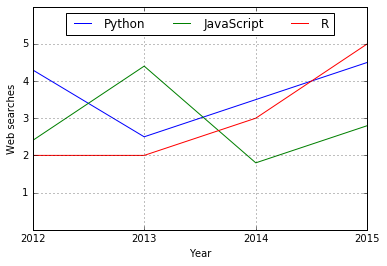

In [3]:
def example_plot():
    plt.plot(x1_values, y1_values, label='Python')
    plt.plot(x2_values, y2_values, label='JavaScript')
    plt.plot(x3_values, y3_values, label='R')

    plt.xlim(2012, 2015)
    plt.ylim(0, 6)
    plt.xticks([2012, 2013, 2014, 2015], ['2012', '2013', '2014', '2015'])
    plt.yticks([1, 2, 3, 4, 5])

    plt.xlabel('Year')
    plt.ylabel('Web searches')

    plt.legend(loc='upper center', ncol=3)
    plt.grid(True)
example_plot()

# Configuring Matplotlib with `rcParams`

You can change matplotlib's settings using the dictionary [`plt.rcParams`](http://matplotlib.org/users/customizing.html#dynamic-rc-settings):

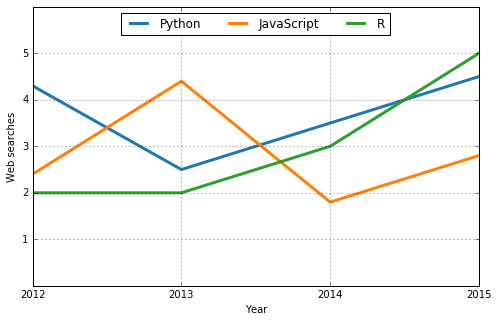

In [4]:
plt.rcParams['figure.figsize'] = (8, 5) # for presentations
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.rcParams['lines.linewidth'] = 3

example_plot()

# Available matplotlib styles

Matplotlib is installed with a set of styles, and Seaborn installs several more (we'll discuss Seaborn soon). You can find more on [GitHub](https://github.com/ctokheim/matplotlibrc).

In [5]:
print(plt.style.available)

['grayscale', 'fivethirtyeight', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-muted', 'dark_background', 'seaborn-dark-palette', 'rhiever', 'seaborn-bright', 'bmh', 'seaborn-white', 'seaborn-poster', 'seaborn-dark', 'seaborn-talk', 'ggplot', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-paper', 'seaborn-notebook', 'classic', 'seaborn-whitegrid']


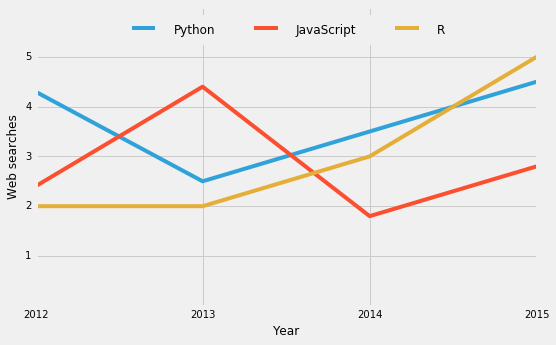

In [6]:
with plt.style.context('fivethirtyeight'):
    example_plot()

## Exercise

Repeat the above plot using one of the styles available via `matplotlib.style.context`.

# Defining new styles

You can define your own style by creating an `.mplstyle` file in the folder `stylelib` in your matplotlib config folder.

In [7]:
cfgdir = mpl.get_configdir()
%ls $cfgdir

 Volume in drive C is Bilbo
 Volume Serial Number is 6655-6286

 Directory of C:\Users\yoavram\.matplotlib

02/11/2016  08:39 AM    <DIR>          .
02/11/2016  08:39 AM    <DIR>          ..
10/28/2015  10:42 AM           119,095 fontList.cache
10/08/2015  10:30 PM            77,400 fontList.py3k.cache
11/12/2015  10:43 PM                23 matplotlibrc
02/10/2016  04:38 PM    <DIR>          stylelib
10/01/2015  04:01 PM    <DIR>          tex.cache
               3 File(s)        196,518 bytes
               4 Dir(s)   9,330,085,888 bytes free


In [10]:
import os
style_path = os.path.join(cfgdir, 'stylelib')
if not os.path.exists(style_path):
    os.makedirs(style_path)
style_path = os.path.join(style_path, 'rhiever.mplstyle')
print(style_path)

C:\Users\yoavram\.matplotlib\stylelib\rhiever.mplstyle


In [11]:
%%writefile $style_path
figure.figsize: 12, 7
figure.edgecolor: white
figure.facecolor: white

lines.linewidth: 2.5
lines.markeredgewidth: 0
lines.markersize: 10
lines.dash_capstyle: butt

legend.fancybox: True

font.size: 14

axes.prop_cycle: cycler('color', ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf'])
axes.linewidth: 0
axes.titlesize: 22
axes.labelsize: 16

xtick.labelsize: 14
ytick.labelsize: 14
xtick.major.size: 0
xtick.minor.size: 0
ytick.major.size: 0
ytick.minor.size: 0

axes.grid: True
grid.alpha: 0.3
grid.linewidth: 0.5
grid.linestyle: --
grid.color: black

savefig.transparent: False
savefig.bbox: tight
savefig.format: png

Writing C:\Users\yoavram\.matplotlib\stylelib\rhiever.mplstyle


In [12]:
plt.style.reload_library()
print(plt.style.available)

['grayscale', 'fivethirtyeight', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-muted', 'dark_background', 'seaborn-dark-palette', 'rhiever', 'seaborn-bright', 'bmh', 'seaborn-white', 'seaborn-poster', 'seaborn-dark', 'seaborn-talk', 'ggplot', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-paper', 'seaborn-notebook', 'classic', 'seaborn-whitegrid']


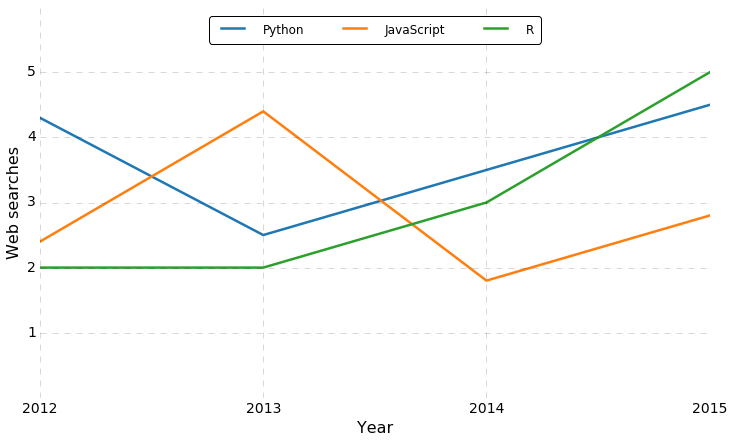

In [13]:
with plt.style.context('rhiever'):
    example_plot()

This style was copied from [Randy Olson](https://github.com/rhiever/python-data-visualization-course/blob/master/Section%203%20-%20Data%20visualization%20in%20Python%20-%20matplotlib/matplotlib%20styles.ipynb).

# Tips for Matplotlib styles

- Always use styles! Saves time, saves code, consistent, someone already thought about the colors , proportions, etc.
- Use `with plt.style.context(stylename):` for setting the style of specific plots.
- Use `plt.style.use(stylename)` to set the style of all plots in the current session.

# Seaborn

Seaborn adds a bunch of styles and also gives a different interface for setting [plot aesthetics](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html), [color palettes](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html), and contexts.

In [14]:
import seaborn as sns
print('Seaborn version:', sns.__version__)

Seaborn version: 0.7.dev


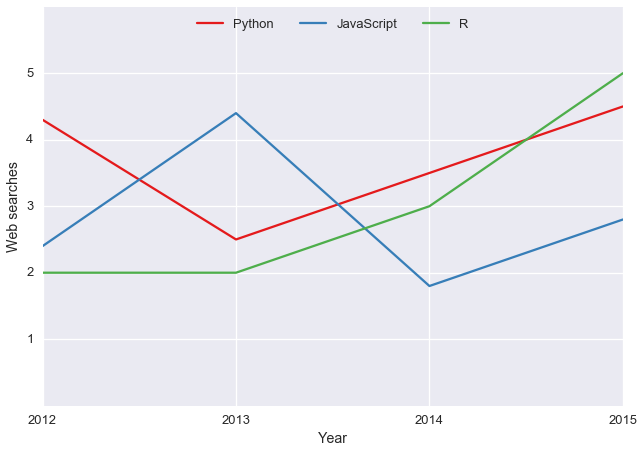

In [15]:
sns.set(
    style='dark',
    context='talk',
    palette='Set1'
)
example_plot()

## Seaborn styles

You can change the style used by matplotlib by calling `seaborn.set_style`:

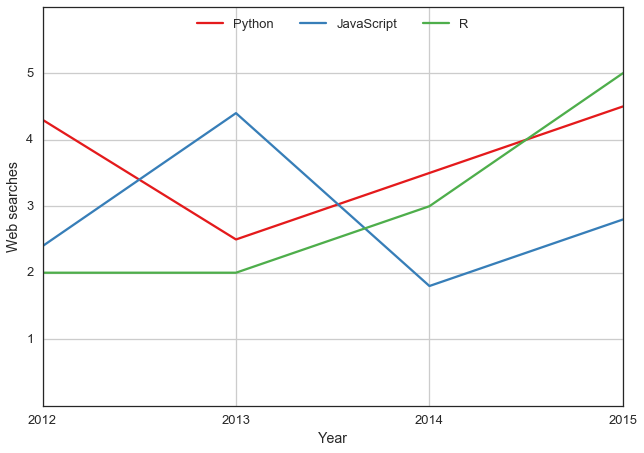

In [16]:
sns.set_style('white')
example_plot()

Some styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the Seaborn function `despine()` to remove them:

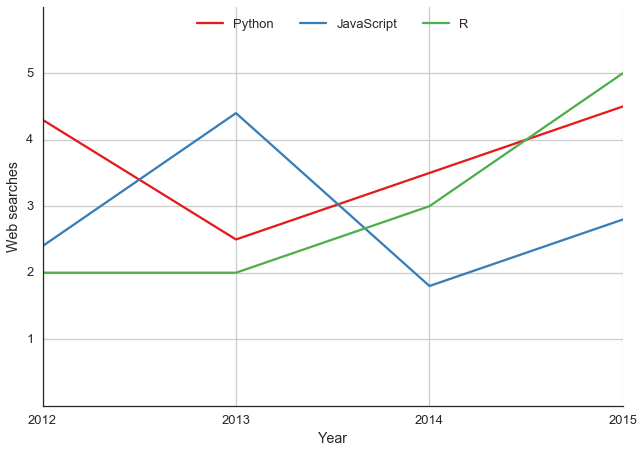

In [17]:
example_plot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine()`. When the ticks don’t cover the whole range of the axis, the `trim` parameter will limit the range of the surviving spines.

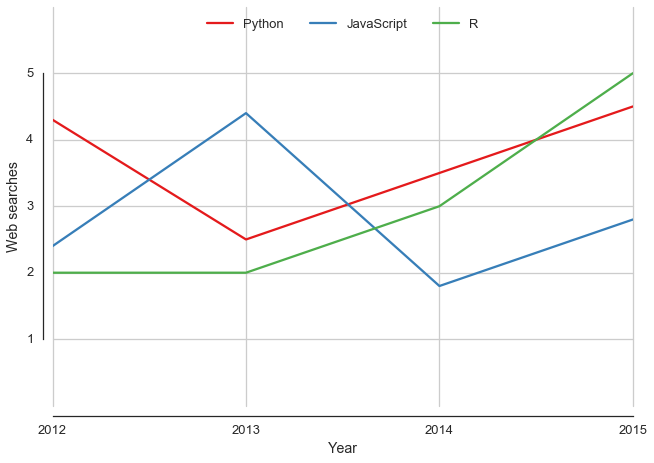

In [18]:
example_plot()
sns.despine(offset=10, trim=True)

Similar to `mpl.style.context`, you can set a Seaborn style for a specific code block using a context manager created by `axes_style`:

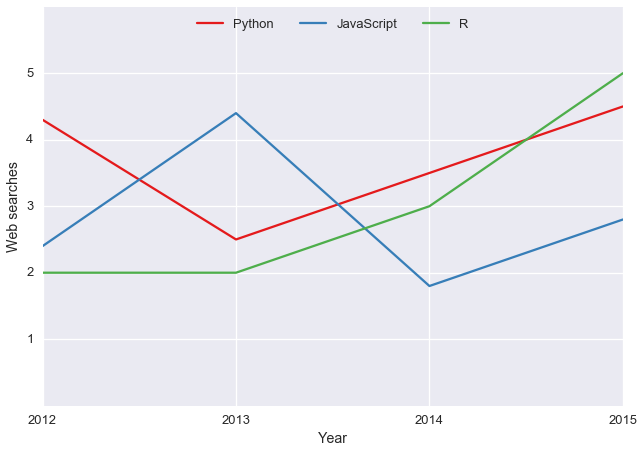

In [19]:
with sns.axes_style("darkgrid"):
    example_plot()

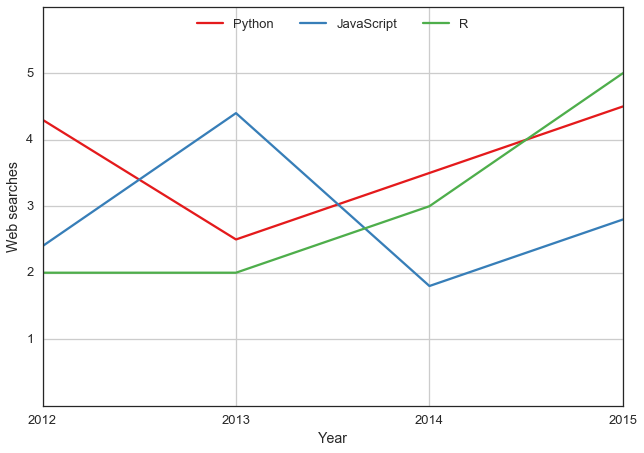

In [20]:
example_plot()

## Seaborn color palettes

Seaborn has many [color palettes](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html) to choose from, including the famous [Colorbrewer](http://colorbrewer2.org/) palettes and Seaborn's own palettes.

You can plot a color palette to see the colors using `sns.palplot`:

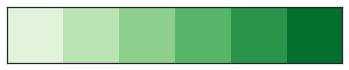

In [21]:
sns.set_palette('Greens')
sns.palplot(sns.color_palette())

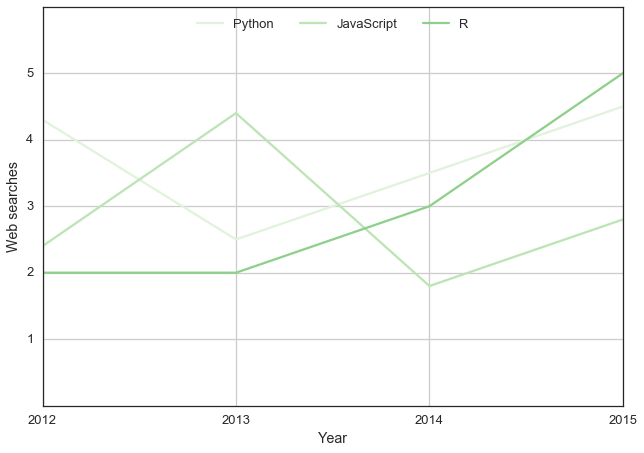

In [22]:
example_plot()

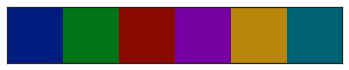

In [23]:
sns.set_palette('dark')
sns.palplot(sns.color_palette())

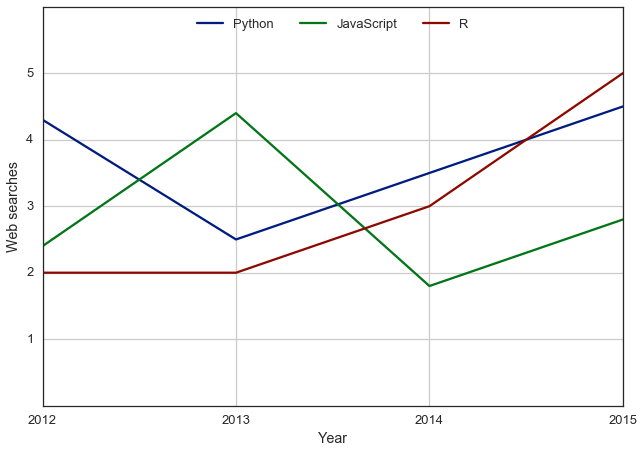

In [24]:
example_plot()

## Seaborn Contexts

Seaborn's contexts automatically control the scaling and proportions according to the target of the plot - `notebook`, `talk`, `paper`. `poster`. In addition, you can scale the font size and set any `rcParam` you want:

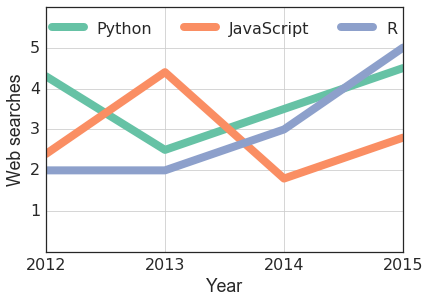

In [25]:
sns.set_palette(sns.color_palette('Set2'))
sns.set_context('paper', font_scale=2, rc={'lines.linewidth': 8})
example_plot()

## Exercise

Use Seaborn styles and contexts and plot the example plot.

# References

- [Data visualization in Python](https://github.com/rhiever/python-data-visualization-course/blob/master/Section%203%20-%20Data%20visualization%20in%20Python%20-%20matplotlib/matplotlib%20styles.ipynb).
- [Matplotlib: Using style sheets](http://matplotlib.org/users/customizing.html#dynamic-rc-settings)
- [Repository for Matplotlib Styles (matplotlibrc)](https://github.com/ctokheim/matplotlibrc)
- [Seaborn figure aesthetics](http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html)
- [Seaborn color palettes](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html)

## Colophon
This notebook was written by [Yoav Ram](http://www.yoavram.com) and is part of the _Python for Engineers_ course.

The notebook was written using [Python](http://pytho.org/) 3.4.4, [IPython](http://ipython.org/) 4.0.3 and [Jupyter](http://jupyter.org) 4.0.6.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)